In [33]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[4].shape

(28, 28)

In [7]:
max_value = np.max(X_train)
print(max_value)

255


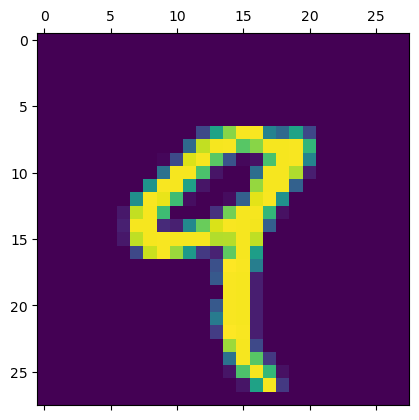

In [8]:
plt.matshow(X_train[4])

In [9]:
y_train[4]

9

To scale the data points between 0 and 1 


As the maximum number within the neuron is 255 we divide whole array with 255

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
max_value = np.max(X_train)
print(max_value)

1.0


To train fully connected neural network

We need to convert 28 * 28 dimension 3-D Array to a 2-D Array which has 784 rows for each hand Written image.

In [12]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [14]:
X_train_flattened.shape

(60000, 784)

In [15]:
X_test_flattened.shape

(10000, 784)

In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
model_1 = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_1.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4743 - accuracy: 0.8758
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3036 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9215
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9253


In [18]:
model_1.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2657 - accuracy: 0.9266


[0.26572877168655396, 0.9265999794006348]

In [21]:
y_predicted = model_1.predict(X_test_flattened)
y_predicted[2]

313/313 [==============================] - 0s 1ms/step


array([3.7631794e-04, 9.9291879e-01, 6.5421009e-01, 2.8027004e-01,
       1.9442897e-02, 1.1336678e-01, 1.2905608e-01, 1.0901649e-01,
       3.4750602e-01, 4.3680903e-02], dtype=float32)

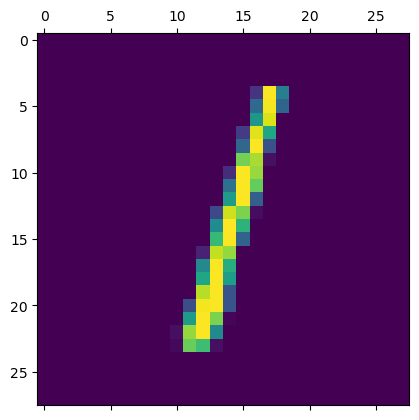

In [23]:
plt.matshow(X_test[2])

Using the **np.argmax** function we can see what is the maximum value within the array 

In [24]:
np.argmax(y_predicted[2])

1

In [27]:
y_pred_labels = [np.argmax(i) for i in y_predicted]
y_pred_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

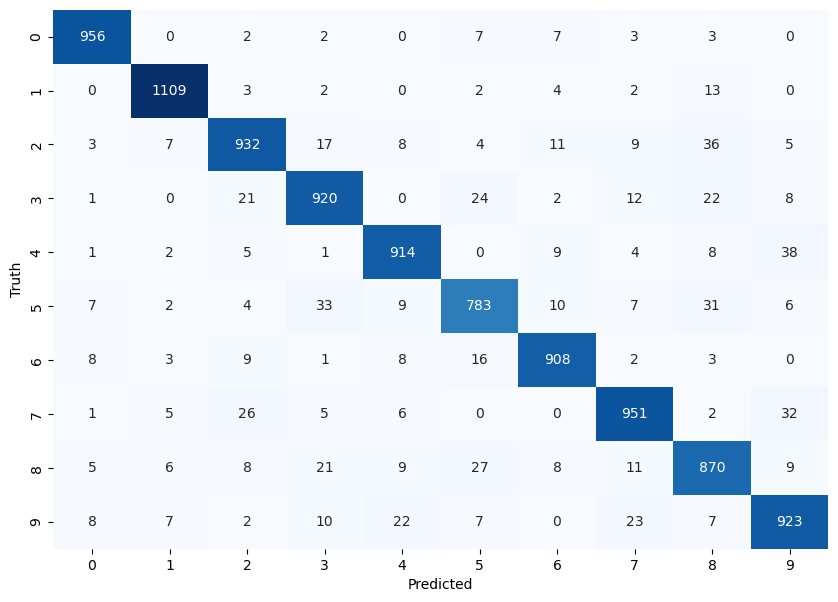

In [34]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## Using Hidden Layer 

In [38]:
model_2 = keras.Sequential([
    keras.layers.Dense(150, input_shape = (784,) , activation ='relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

model_2.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

model_2.fit(X_train_flattened, y_train , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2515 - accuracy: 0.9279
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1091 - accuracy: 0.9683
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0731 - accuracy: 0.9778
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0546 - accuracy: 0.9834
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0421 - accuracy: 0.9872


In [39]:
model_2.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0699 - accuracy: 0.9779


[0.06994343549013138, 0.9779000282287598]

Text(95.72222222222221, 0.5, 'Truth')

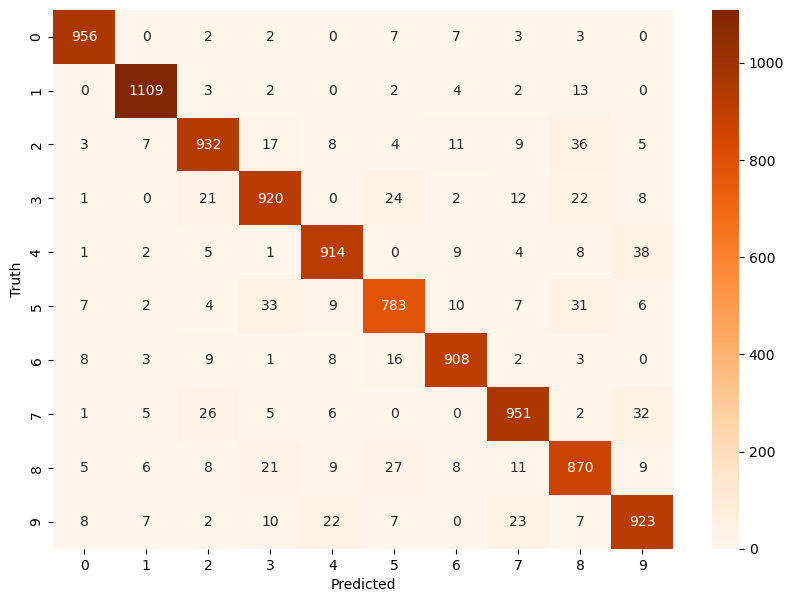

In [44]:
cm_2 = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm_2, annot=True, cmap= 'Oranges',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In the above dataset we have have seen that the maximum value stored in the pizel of the image array was 255 so we divided the array with 255 

but we can directly flatted the 3D array to a 2D array as shown below.

In [45]:
model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_3.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2660 - accuracy: 0.9236
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1221 - accuracy: 0.9631
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0854 - accuracy: 0.9743
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0636 - accuracy: 0.9805
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0509 - accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0401 - accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0331 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0276 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0223 - accuracy: 0.9932
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.019

In [46]:
model_3.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0783 - accuracy: 0.9776


[0.07828790694475174, 0.9775999784469604]